In [1]:
# 필요한 package loading
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.neighbors import KernelDensity
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# 데이터 생성 함수
np.random.seed(124)

def makeData(N):

    x = []
    for i in range(N):
        a = i/1000 + np.random.uniform(-3, 2)
        r = np.random.uniform(-5, 10)
        if(r >= 9.8):
            r = r + 10
        elif(r<(-4.8)):
            r = r +(-10)
        x.append([a + r])

    return np.array(x)

In [3]:
# 500개의 샘플 데이터 생성
n = 500
x = makeData(n)
x

array([[ 3.71239680e+00],
       [ 1.73618544e+00],
       [-1.96463089e+00],
       [ 1.27493721e+00],
       [ 5.11066005e+00],
       [-3.15533381e+00],
       [ 8.57869554e+00],
       [-3.55243438e+00],
       [ 3.13828694e+00],
       [ 8.62800899e+00],
       [-9.75007404e-01],
       [ 8.63385616e-01],
       [ 1.38697469e+00],
       [ 8.72414309e+00],
       [ 1.15748710e+01],
       [-5.37403067e+00],
       [ 3.60610828e+00],
       [ 5.44706747e+00],
       [ 1.45885926e+00],
       [ 9.32915725e+00],
       [ 3.55784865e+00],
       [ 2.00878951e+00],
       [ 5.69448297e+00],
       [ 5.96416412e+00],
       [ 5.65475626e+00],
       [ 5.87879483e+00],
       [ 4.02909033e+00],
       [-1.08641370e+00],
       [ 6.95957212e+00],
       [ 3.92921950e+00],
       [ 6.01990437e+00],
       [-2.61629736e+00],
       [-9.94347976e-01],
       [ 5.82959558e+00],
       [ 3.45793775e+00],
       [ 7.58840148e+00],
       [ 4.65128761e+00],
       [ 1.01688189e+01],
       [ 4.4

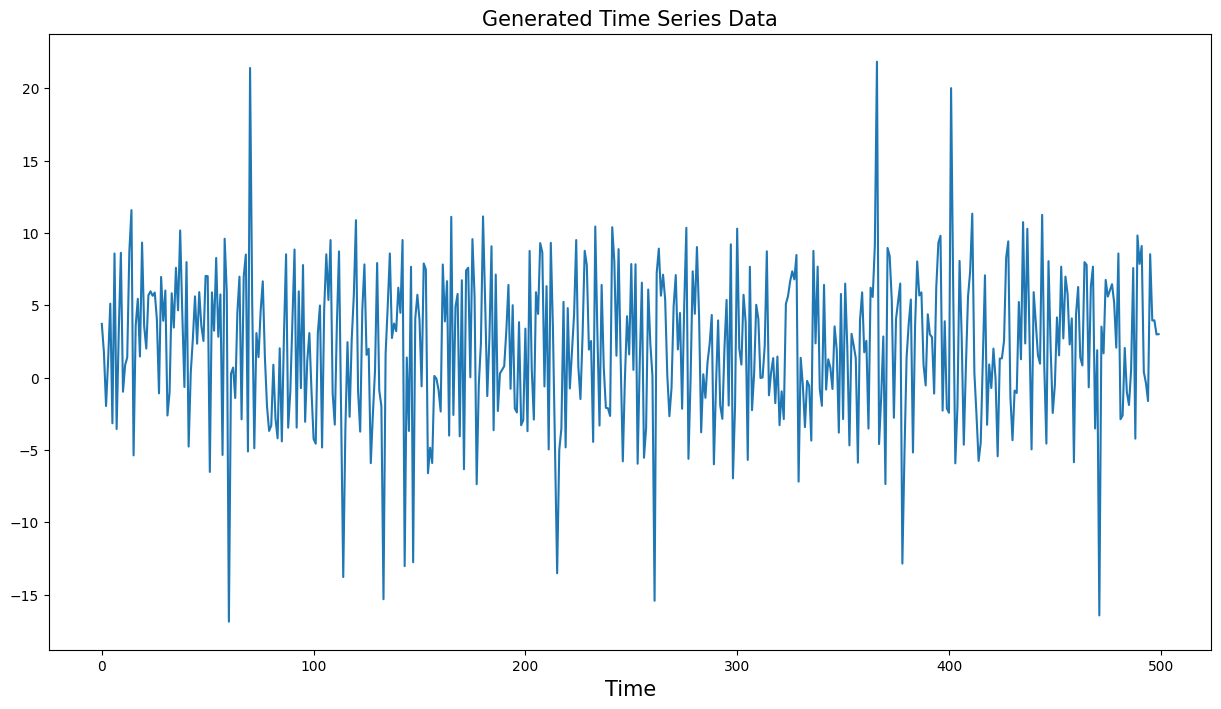

In [4]:
# visualize the generated data
x_ax = range(n)
plt.figure(figsize = (15, 8))
plt.plot(x_ax, x)
plt.xlabel('Time', fontsize = 15)
plt.title('Generated Time Series Data', fontsize = 15)
plt.show()

In [5]:
# data scaling using variance
x = scale(x)

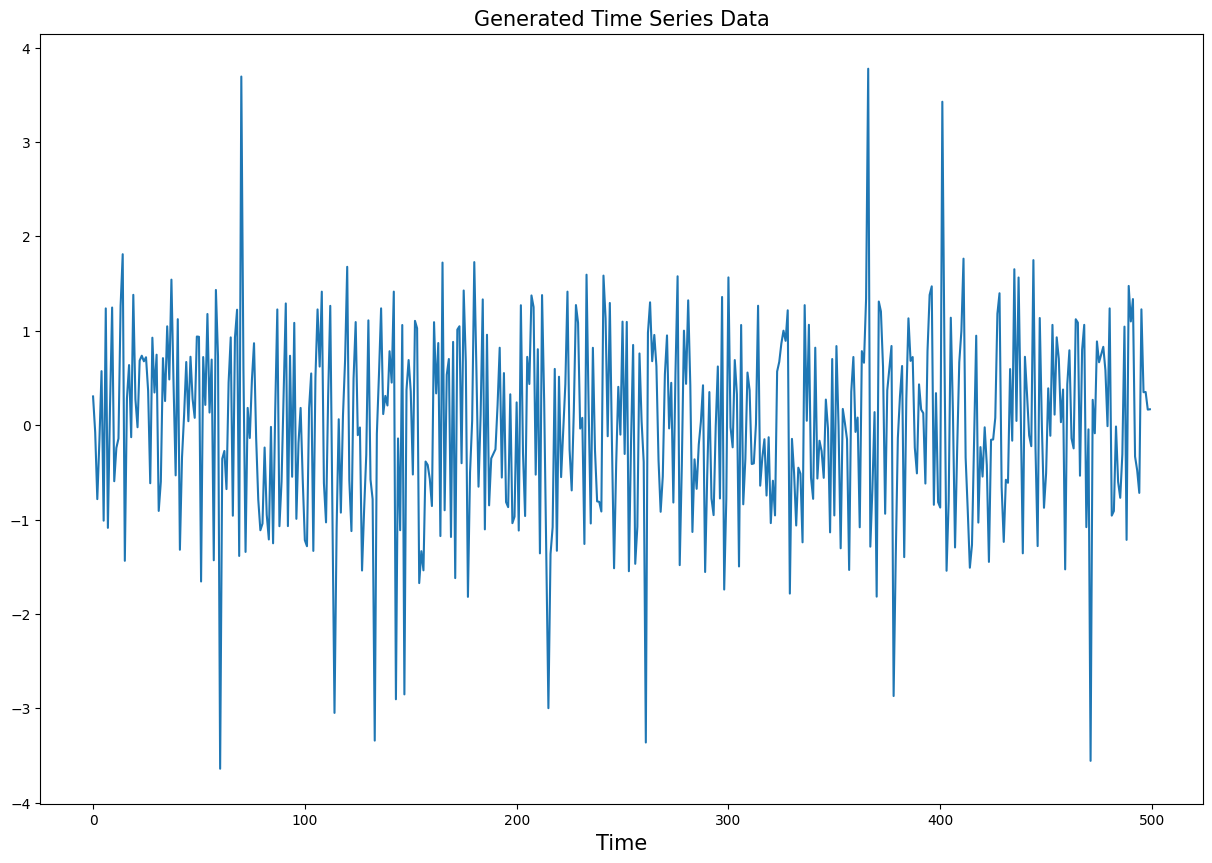

In [6]:
# visualize the scaled data
x_ax = range(n)
plt.figure(figsize = (15, 10))
plt.plot(x_ax, x)
plt.xlabel('Time', fontsize = 15)
plt.title('Generated Time Series Data', fontsize = 15)
plt.show()

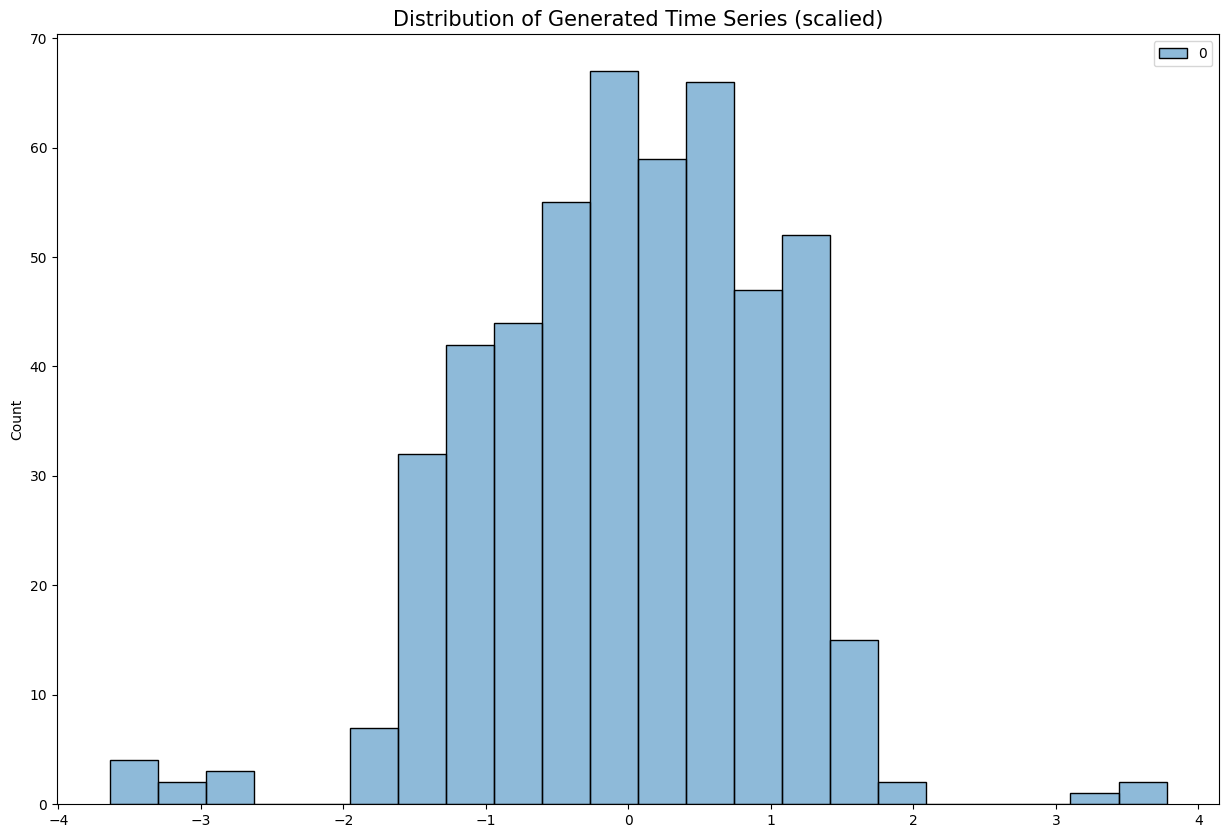

In [7]:
# visualize the distribution
plt.figure(figsize=(15, 10))
sns.histplot(x)
plt.title('Distribution of Generated Time Series (scalied)', fontsize = 15)
plt.show()

In [8]:
# dataframe 만들기
data = pd.DataFrame(x)
data['label'] = pd.Series()
data

<ipython-input-8-1aa02af722dd>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['label'] = pd.Series()


,0,label
0,0.304345,NaN
1,-0.074382,NaN
2,-0.783617,NaN
3,-0.162777,NaN
4,0.572313,NaN
...,...,...
495,1.227024,NaN
496,0.349282,NaN
497,0.351312,NaN
498,0.164873,NaN


In [9]:
for i in range(len(data)):

  if abs(data.loc[i, 0]) <= 3:
    data.loc[i, 'label'] = 0
  else:
    data.loc[i, 'label'] = 1

# print the dataframe
data

,0,label
0,0.304345,0.0
1,-0.074382,0.0
2,-0.783617,0.0
3,-0.162777,0.0
4,0.572313,0.0
...,...,...
495,1.227024,0.0
496,0.349282,0.0
497,0.351312,0.0
498,0.164873,0.0


KDE model train - parameter 설명: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html

In [10]:
# model train

# kernel: gaussian (default), tophat, epanechnikov, exponential, linear, cosine
# metric: euclidean (default), mantattan, mahalanobis

kernaldens = KernelDensity(algorithm = 'ball_tree', kernel = 'epanechnikov', metric = 'manhattan', bandwidth= 0.01)
kernaldens.fit(x)
print(kernaldens)

KernelDensity(algorithm='ball_tree', bandwidth=0.01, kernel='epanechnikov',
              metric='manhattan')


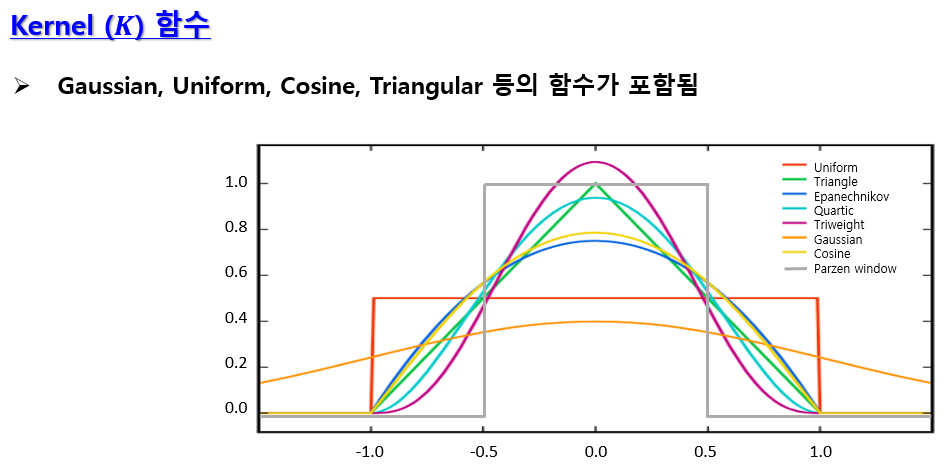

In [11]:
# 각 sample의 KDE 모델의 negative log-likelihood를 계산
scores = kernaldens.score_samples(x)
scores

array([-0.64081583, -1.24603944, -0.15184705, -0.47560859, -1.2454369 ,
       -1.89711998, -0.75976171, -0.6772688 , -1.89711998, -1.06171567,
       -0.48203383, -0.43453793, -0.02673072, -0.36630807, -1.89711998,
       -1.3726733 , -1.11040841, -1.89668183, -0.74977248, -0.64877743,
       -0.39394128, -0.20374129, -0.31099944, -1.02989385, -0.24686274,
       -0.01933982, -0.53423392, -0.59677306, -0.62063429, -0.39083899,
       -1.20405636, -0.32203524, -0.5261164 , -1.24270301, -1.252511  ,
       -0.83680094, -1.23606415, -1.89711998, -0.41836091, -1.00562927,
       -0.90490122, -1.89711998, -0.79293596, -0.60379403, -0.12106962,
       -0.25722458,  0.09883104, -0.41719751, -0.52827476, -0.82033072,
       -0.54202278, -1.89711998,  0.092621  , -0.93129295, -1.23391341,
       -0.81660566, -0.31245031, -1.3726733 , -1.37208326, -0.01512643,
       -1.89711998, -0.65340493, -0.90758377, -1.25351592, -0.86891763,
       -0.37739915, -0.22876379, -0.32064905, -0.43649837, -1.63

-1.8971199848858813


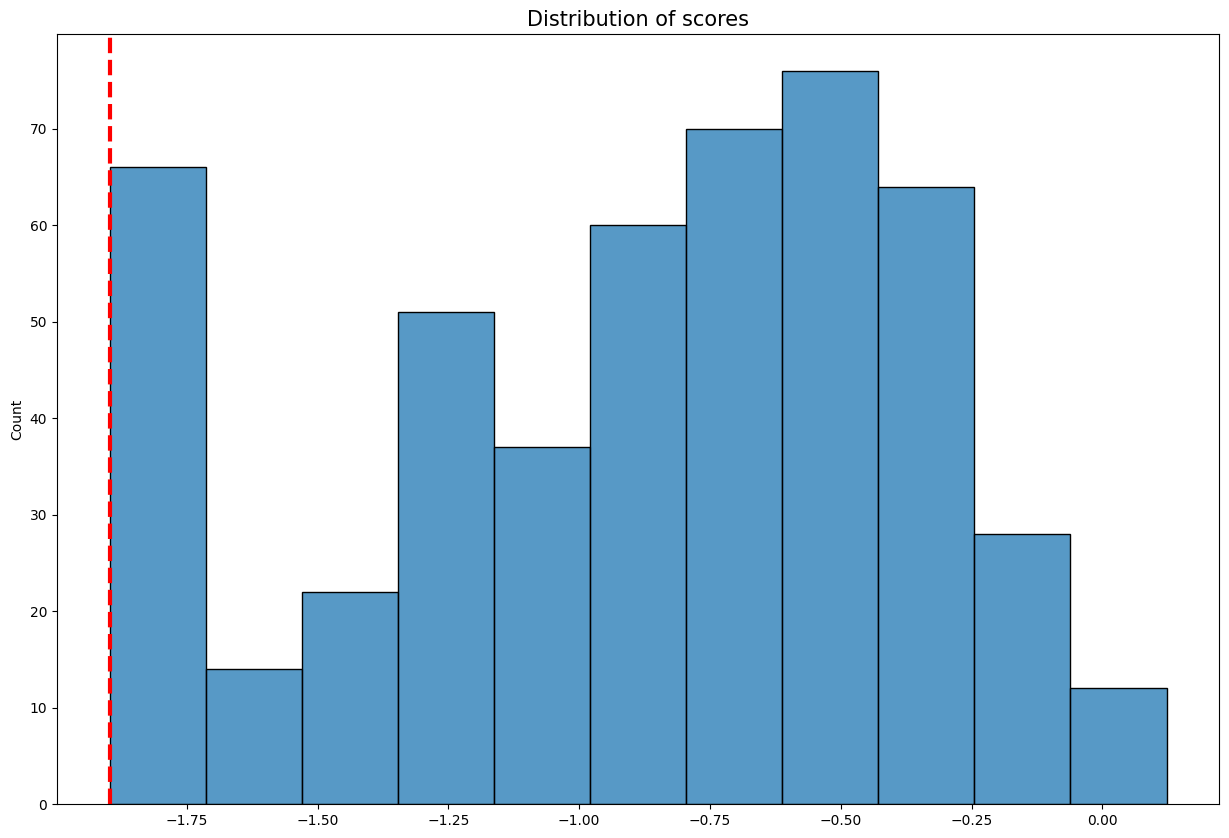

In [12]:
# scores를 바탕으로 .01분위수로 threshold 설정
thresh = np.quantile(scores, .01)
print(thresh)

# visualize the distribution
plt.figure(figsize=(15, 10))
sns.histplot(scores)
plt.axvline(x=thresh, color='r', linestyle='--', linewidth=3)
plt.title('Distribution of scores', fontsize = 15)
plt.show()

In [13]:
#threshold를 바탕으로 데이터의 인덱스 설정
index = np.where(scores <= thresh)
values = x[index]

In [14]:
pd.concat([pd.DataFrame(index).T[0], pd.DataFrame(values)[0]])

0     14.000000
1     37.000000
2     41.000000
3     51.000000
4     60.000000
        ...    
38     1.748578
39    -3.556417
40     0.582440
41    -0.478256
42    -0.717586
Name: 0, Length: 86, dtype: float64

In [15]:
# index를 사용해 이상탐지 결과 저장
data['test'] = 0
data.loc[index[0][:], 'test'] = 1

data

,0,label,test
0,0.304345,0.0,0
1,-0.074382,0.0,0
2,-0.783617,0.0,0
3,-0.162777,0.0,0
4,0.572313,0.0,0
...,...,...,...
495,1.227024,0.0,0
496,0.349282,0.0,0
497,0.351312,0.0,0
498,0.164873,0.0,0


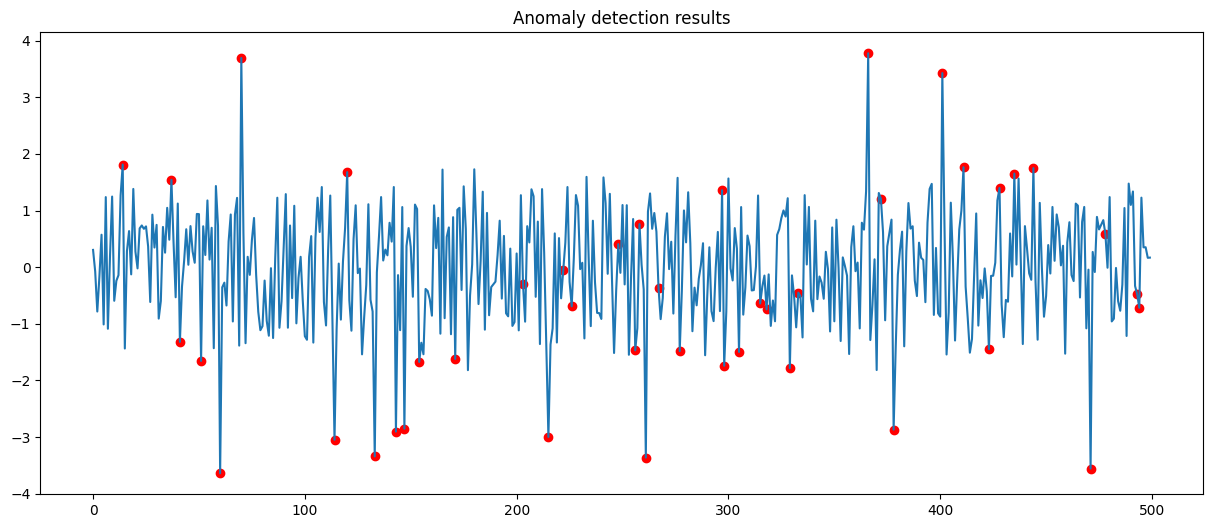

In [16]:
# visualize the plot
plt.figure(figsize = (15, 6))
plt.plot(x_ax, x)
plt.title("Anomaly detection results")
plt.scatter(index,values, color='r')
plt.show()

In [17]:
# evaluation
scores = classification_report(data['label'], data['test'])
print(scores)

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96       492
         1.0       0.19      1.00      0.31         8

    accuracy                           0.93       500
   macro avg       0.59      0.96      0.64       500
weighted avg       0.99      0.93      0.95       500



## Practice

In [18]:
# KDE 모델 parameter tuning (자유롭게 변경 가능)
kernaldens = KernelDensity(algorithm = 'auto', kernel = 'gaussian', metric = 'euclidean', bandwidth= 0.1)
kernaldens.fit(x)
print(kernaldens)

KernelDensity(bandwidth=0.1)


In [19]:
# 각 sample의 KDE 모델 negative log-likelihood를 계산
scores = kernaldens.score_samples(x)

-4.086035248263661


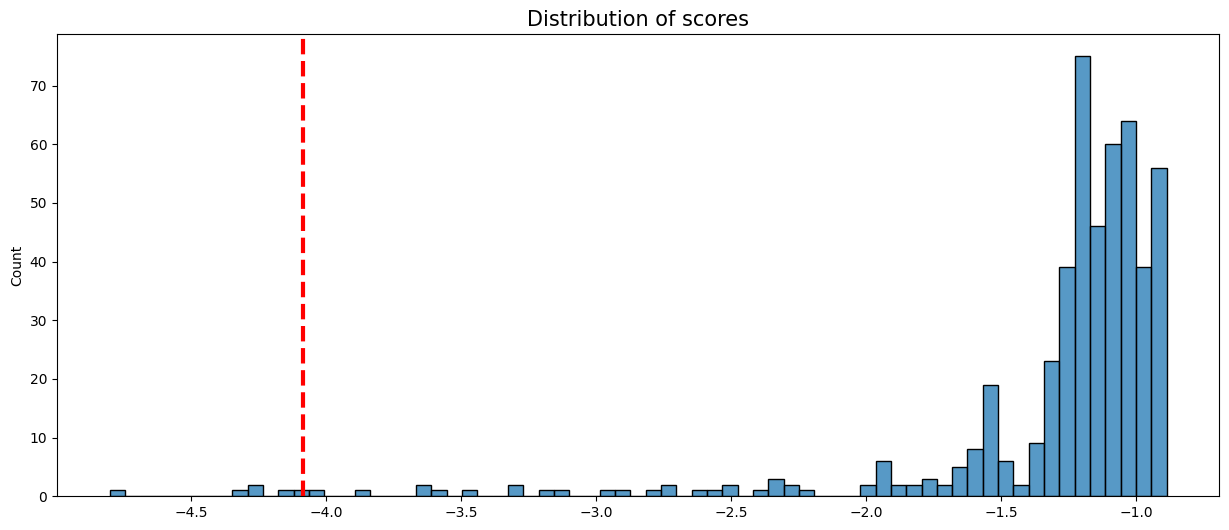

In [20]:
# scores를 바탕으로 .01분위수로 threshold 설정
thresh = np.quantile(scores, .01)
print(thresh)

# visualize the distribution
plt.figure(figsize=(15, 6))
sns.histplot(scores)
plt.axvline(x=thresh, color='r', linestyle='--', linewidth=3)
plt.title('Distribution of scores', fontsize = 15)
plt.show()

In [21]:
# threshold를 바탕으로 데이터의 인덱스 설정
index = np.where(scores <= thresh)
values = x[index]

# index를 사용해 이상탐지 결과 저장
data['test'] = 0
data.loc[index[0][:], 'test'] = 1

data

,0,label,test
0,0.304345,0.0,0
1,-0.074382,0.0,0
2,-0.783617,0.0,0
3,-0.162777,0.0,0
4,0.572313,0.0,0
...,...,...,...
495,1.227024,0.0,0
496,0.349282,0.0,0
497,0.351312,0.0,0
498,0.164873,0.0,0


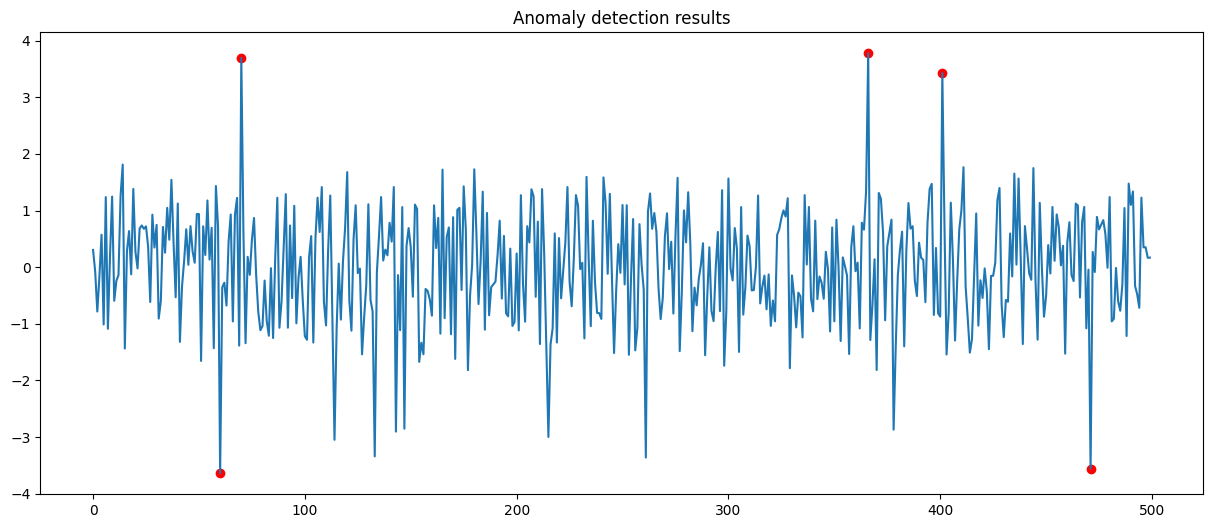

In [22]:
# visualize the plot
plt.figure(figsize = (15, 6))
plt.plot(x_ax, x)
plt.scatter(index,values, color='r')
plt.title("Anomaly detection results")
plt.show()

In [23]:
# performance check
scores = classification_report(data['label'], data['test'])
print(scores)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       492
         1.0       1.00      0.62      0.77         8

    accuracy                           0.99       500
   macro avg       1.00      0.81      0.88       500
weighted avg       0.99      0.99      0.99       500

